In [1]:
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
seed=np.random.seed(3417259200)

# Medium Articles Dataset

We provide a dataset of medium articles which have to be tagged to corresponding topics (software-development, artificial intellignece, Ui/UX). Along with articles we have subscriptions lists. The articles may be related by common subscription lists. The goal is to exploit this naturally occuring network structure for classifying articles to topics. Hence, it is a 3-way node classification task

In [3]:
def read_data(file_name: str):
    """Read the medium articles with lists

    Args:
        dir_name (str): Root directory of the medium title files and lists.

    Returns:
        final_data: merged dataframes with articles and lists
    """

    final_data = pd.read_csv(file_name+".csv")
    return final_data

In [4]:
final_data = pd.read_csv("full_data_without_labels.csv")
final_data

,article,title,subtitle,author,date,list
0,https://medium.com/@maniakacademy/code-demo-sh...,Code/Demo Share: Palo Alto Firewall Network In...,IP is broken as a unit of Control! IDENTITY as...,Sebastian Maniak,2022-08-17,https://medium.com/@zemmali1990/list/aws-49f68...
1,https://medium.com/towards-artificial-intellig...,Clustering using Social Graph Network,A Social Graph Network can be formed when ther...,Naveed Ahmed Janvekar,2022-01-29,https://medium.com/@TomaszCieplak/list/graph-d...
2,https://medium.com/@sarafparam/transformers-fo...,Transformers for Time-Series,Forecasting still remains to be dominated by S...,Param Saraf,2020-10-20,https://medium.com/@sergiobonato/list/time-ser...
3,https://medium.com/towards-data-science/review...,Reviewing A/B Testing Course by Google on Udacity,Read to find out how A/B tests are performed a...,Suyash Maheshwari,2020-05-10,https://medium.com/@online.rajib/list/ml-c2cac...
4,https://medium.com/towards-data-science/a-comp...,A Comprehensive Hands-on Guide to Transfer Lea...,Deep Learning on Steroids with the Power of Kn...,Dipanjan (DJ) Sarkar,2018-11-14,https://medium.com/@farhanhanavi07/list/deep-l...
...,...,...,...,...,...,...
27713,https://medium.com/cometheartbeat/deep-learnin...,Deep Learning Techniques you Should Know in 2022,"Over the years, Deep Learning has really taken...",Nisha Arya Ahmed,2022-04-21,https://medium.com/@vigguvenki/list/deep-learn...
27714,https://medium.com/towardsdev/intro-to-object-...,Intro to Object-Oriented Programming For Data ...,Implement a simple Linear Regression with OOP ...,Bex T.,2021-04-12,https://medium.com/@or.matalon2/list/oop-4aad5...
27715,https://medium.com/towards-data-science/learn-...,Learn Enough Docker to be Useful,Part 1: The Conceptual Landscape — Containers ...,Jeff Hale,2019-01-09,https://medium.com/@vaibhavb2473/list/machine-...
27716,https://medium.com/berndruecker/moving-from-em...,Moving from embedded to remote workflow engines,"For a long time, we have advocated for an arch...",Bernd Rücker,2022-02-08,https://medium.com/@giamma80/list/java-3c31810...


In [5]:
train = read_data("train")
train

,index,article,title,subtitle,author,date,list,labels
0,3279,https://medium.com/dev-genius/how-to-convert-m...,How to Convert MP4 Videos to Animated GIFs,With Kazam and ffmpeg on GNU/Linux systems — I...,Jordi Bassaganas,2022-06-02,https://medium.com/@zzpzaf.se/list/var-4f4a92d...,software-development
1,26139,https://medium.com/towards-data-science/a-cust...,"Custom SpaCy Model Deployment with AWS ECR, Sa...",A tutorial on how to deploy SpaCy with AWS. — ...,Cheng,2021-06-04,https://medium.com/@munivinayk/list/nlp-242e66...,artificial-intelligence
2,9946,https://medium.com/towards-data-science/5-book...,5 Books To Grow As A Leader In Data Analytics,Are you a senior analyst growing towards a man...,Valentin Mucke,2022-01-15,https://medium.com/@Nikhil_Phadtare/list/books...,artificial-intelligence
3,2353,https://medium.com/@unsuitable001/package-cron...,"package:cronet, an HTTP Dart/Flutter package w...",My Dart Google Summer of Code 2021 experience....,Soumyadip Monda,2021-08-21,https://medium.com/@djibi.jb/list/flutter-e53c...,software-development
4,8266,https://medium.com/towards-data-science/statis...,Statistics in Python — Collinearity and Multic...,Understand how to discover multicollinearity i...,Wei-Meng Lee,2021-10-01,https://medium.com/@abhiagar/list/stats-765e27...,software-development
...,...,...,...,...,...,...,...,...
22377,6669,https://medium.com/towards-data-science/linkin...,Linking Documents in a Semantic Graph (Part 2),How to design your own graph using TigerGraph ...,Akash Kau,2020-05-27,https://medium.com/@william.sheffel/list/tiger...,artificial-intelligence
22378,18163,https://medium.com/towards-data-science/automa...,Automate Video Editing with Python,Automate the editing of explainer videos to cr...,Samir Saci,2022-11-10,https://medium.com/@jstart.james/list/photogra...,software-development
22379,13001,https://medium.com/towards-data-science/make-p...,Make Python Run As Fast As C,Faster Python Code With Numba — The Speed Issu...,Lukas Frei,2021-08-04,https://medium.com/@jstart.james/list/system-e...,artificial-intelligence
22380,25234,https://medium.com/towards-data-science/6-juli...,6 Julia Frameworks to Create Desktop GUI’s and...,Julia is used for a lot of deeply technical ap...,Logan Kilpatrick,2022-01-05,https://medium.com/@gurumurthi/list/julia-3583...,software-development


In [6]:
test = read_data("test")
test

,index,article,title,subtitle,author,date,list,labels
0,2291,https://medium.com/towards-data-science/how-to...,How to Use the IBM Watson Tone Analyzer to Per...,How to use the IBM Watson Artificial Intellige...,Graham Harrison,2022-01-02,https://medium.com/@4ndres.gaviria/list/nlp-to...,artificial-intelligence
1,7292,https://medium.com/towards-data-science/surviv...,Survival Analysis: Intuition & Implementation ...,There is a statistical technique which can ans...,Anurag Pandey,2019-01-06,https://medium.com/@jz5246/list/analytics-559c...,artificial-intelligence
2,6768,https://medium.com/experience-stack/embrace-co...,Embrace Complexity (Part 1),Why all organisations should build internal ne...,Tony Seale,2022-02-04,https://medium.com/@yasha.brener/list/data-man...,software-development
3,15003,https://medium.com/towards-data-science/every-...,"Every Complex DataFrame Manipulation, Explaine...","Melts, pivots, joins, explodes, & more — Panda...",Andre Ye,2020-07-22,https://medium.com/@4ndres.gaviria/list/dataop...,artificial-intelligence
4,19782,https://medium.com/towards-data-science/macroe...,Macroeconomic & Financial Factors and Ordinary...,Econometrics model using Arbitrage Pricing The...,Sarit Maitra,2020-06-27,https://medium.com/@halo9pan/list/quantitative...,software-development
...,...,...,...,...,...,...,...,...
3945,14424,https://medium.com/towards-data-science/normal...,Normalization vs Standardization — Quantitativ...,Stop using StandardScaler from Sklearn as a de...,Shay Geller,2019-04-04,https://medium.com/@farhanhanavi07/list/applie...,artificial-intelligence
3946,18949,https://medium.com/@petruknisme/getting-starte...,Getting Started with Covenant C2 for Red Teaming,Command and Control is part of Red Teaming tac...,Aan,2021-11-21,https://medium.com/@jimmy.winghang/list/mitre-...,software-development
3947,9305,https://medium.com/towards-data-science/how-to...,How to Create a Vector-Based Movie Recommendat...,Building a movie recommendation system using t...,Michelangiolo Mazzeschi,2021-12-10,https://medium.com/@subhasis.jethy/list/recomm...,artificial-intelligence
3948,24337,https://medium.com/towards-data-science/how-to...,How to Use Pandas for Big Data,Run distributed workload with Pandas on Spark ...,Edwin Tan,2022-01-25,https://medium.com/@jethro_torczon/list/big-da...,artificial-intelligence


In [7]:
train["labels"].value_counts()

labels
software-development       11586
artificial-intelligence    10646
ux                           150
Name: count, dtype: int64

In [8]:
test["labels"].value_counts()

labels
software-development       2022
artificial-intelligence    1899
ux                           29
Name: count, dtype: int64

In [9]:
train.subtitle

0        With Kazam and ffmpeg on GNU/Linux systems — I...
1        A tutorial on how to deploy SpaCy with AWS. — ...
2        Are you a senior analyst growing towards a man...
3        My Dart Google Summer of Code 2021 experience....
4        Understand how to discover multicollinearity i...
                               ...                        
22377    How to design your own graph using TigerGraph ...
22378    Automate the editing of explainer videos to cr...
22379    Faster Python Code With Numba — The Speed Issu...
22380    Julia is used for a lot of deeply technical ap...
22381    For years now, most of us have heard the word ...
Name: subtitle, Length: 22382, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
"""Generate encoding for labels using label encoder
    """
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(train["labels"])

Y = multilabel_binarizer.transform(train["labels"])
texts = [x[0]+" " + x[1] for x in zip(train.title,train.subtitle)]

In [11]:
from gensim.models import Word2Vec
"""Train word2vec model on title + subtitles to establish a baseline 
    without network structure
    """
all_texts = [x[0]+" " + x[1] for x in zip(final_data.title,final_data.subtitle)]

word2vec_model = Word2Vec([text.split(" ") for text in all_texts], vector_size=128, window=10, epochs=30, sg=1, workers=4,min_count=1)

In [12]:
from sklearn.svm import SVC
embeddings = []
"""Infer word2vec embeddings for article titles and subtitles using trained word2vec model
    """
for text in texts:
    embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddings).shape)
X_word2vec = np.vstack(embeddings)


(22382, 128)


In [13]:
"""Train a SVM classifier on generated article embeddings
    """
svc = SVC()
svc.fit(X_word2vec,Y)

SVC()

In [14]:
test_embeddings = []
text_texts = [x[0]+" " + x[1] for x in zip(test.title,test.subtitle)]
"""Compute embeddings for test samples
    """
for text in text_texts:
    test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(test_embeddings).shape)
X_word2vec_test = np.vstack(test_embeddings)


(3950, 128)


In [15]:
"""Generate predictions using the SVM classifier for test articles
    """
predictions = svc.predict(X_word2vec_test)

In [16]:
"""Encode predictions
    """
Y_test = multilabel_binarizer.transform(test["labels"])

Y_test

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
from sklearn import metrics
"""Compute Macro f1"""
print(metrics.f1_score(Y_test, predictions,average="macro"))


0.5510583481481625


In [18]:
print(metrics.classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1899
           1       0.84      0.81      0.83      2022
           2       0.00      0.00      0.00        29

    accuracy                           0.82      3950
   macro avg       0.55      0.55      0.55      3950
weighted avg       0.82      0.82      0.82      3950


C:\Users\Traian\PycharmProjects\pythonProject18\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Traian\PycharmProjects\pythonProject18\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Traian\PycharmProjects\pythonProject18\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [19]:
import networkx as nx
import numpy as np

def compute_spectral_embeddings(graph: nx.Graph, dim: int) -> np.ndarray:
    """Perform spectral clustering on the graph and compute low-dimensional node representations.
    Does not normalize the Laplacian.

    Args:
        graph (nx.Graph): The graph.
        dim (int): The dimension of representations. This corresponds to the number of eigenvectors used.

    Returns:
        np.ndarray: Node representations (sorted by node ID, ascending), shape (num_nodes, dim).
    """
    adjacency_matrix = nx.to_numpy_array(graph, nodelist=sorted(graph.nodes))
    outDeg=np.sum(adjacency_matrix,axis=1)
    outDeg=np.diag(outDeg)
    Laplacian=outDeg-adjacency_matrix
    # make sure the matrix is symmetric
    eigenvalues, eigenvectors = np.linalg.eigh(Laplacian)
    indices=np.argsort(eigenvalues)
    eigenvectors=eigenvectors[:,indices]
    assert (adjacency_matrix == adjacency_matrix.T).all()

    result = eigenvectors[:, :dim]

    # START ANSWER

    # END ANSWER

    return result


In [20]:
import networkx as nx
import numpy as np
def dfs(n,parent,):
    pick=np.random.rand()
    length=len(graph.neighbours(n))


def random_walks(graph: nx.Graph, num_walks: int, walk_length: int) -> np.ndarray:
    """Perform random walks on an unweighted graph.

    Args:
        graph (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    result = []
    for n in graph.nodes:
        for number in range(num_walks):
            lst=[]
            node=n
            for cnt in range(walk_length):
                lst.append(node)
                ngh=list(graph.neighbors(node))
                pick=np.random.rand()
                unit=1/len(ngh)
                node=ngh[int(pick/unit)]
            result.append(lst)
    # START ANSWER

    # END ANSWER

    return np.array(result)

# Pipeline Overview

our goal is to construct a graph from  given data by connecting nodes that at least share one common subscription list.

This step is followed by a random walk to construct node embeddings.

Then the node embeddings are employed for the task of topic classification.

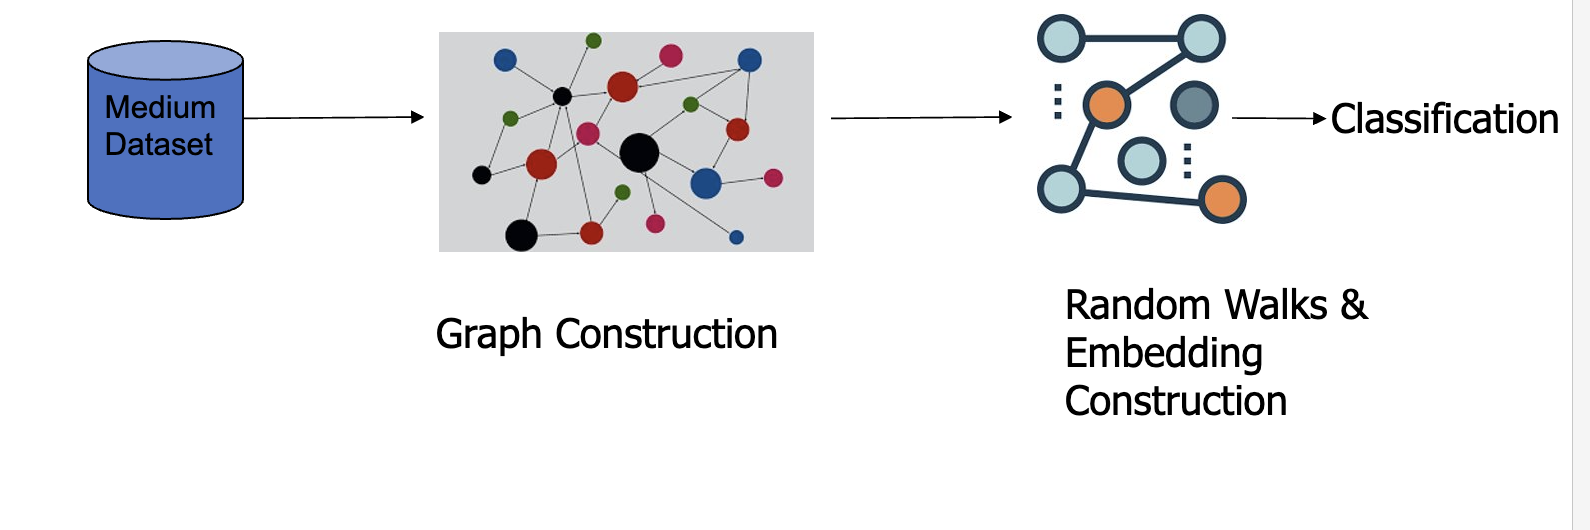

# Form graph

Our goal is to construct a graph from  given data by connecting nodes that at least share one common subscription list. The networkx part has already been written for you. 

Your task here is to write the module to construct the edges and find isolated nodes and also analyze the resulting graph by reporting number of edges, number of nodes, number of isolated nodes. 



In [21]:


from typing import List,Dict


def get_edges(data: pd.DataFrame, nodes) -> List:
    """ Given the dataframe with articles and lists return the set of edges
        Args:
        data (pd.DataFrame): The medium dataset
        nodes: dict (nodeid: article title)
    Returns:
            edges (List[tuple]): List of edges"""
    edges = []    
    dic={}
    freq={}
    leng=len(data)
    ## START
    for index,row in data.iterrows():
        l=row['list'].split("; ")
        for x in l:
            if x in dic:
                dic[x].append(index)
            else:
                dic[x]=[index]
    for k in dic.keys():
        for i in range(0,len(dic[k])):
            for j in range(i+1,len(dic[k])):
                k1=dic[k][i]
                k2=dic[k][j]
                edges.append((k1,k2))
                edges.append((k2,k1))
                # connection power was used to try to bias the random walk for better performance on kaggle
                # make it more probable to walk on better connected documents by counting the number of connections they have
                # connection=common subscriptions in lists
                if (k1,k2) in connection_power:
                    connection_power[(k1,k2)]=connection_power[(k2,k1)]=1+connection_power[(k1,k2)]
                else:
                    connection_power[(k1,k2)]=connection_power[(k2,k1)]=1
    ##END
    return edges




In [22]:
def get_nodes(data: pd.DataFrame) -> Dict:
    """ Given the dataframe with articles and lists return the set of nodes
        Args:
        data (pd.DataFrame): The medium dataset
    Returns:
        nodes: dict (nodeid: article title)"""
    nodes = {}
    for index, row in data.iterrows():
        if index not in nodes:
            nodes[index] = row["title"]
    print(len(nodes))
    return nodes

In [23]:
import networkx as nx
def form_graph(data: pd.DataFrame) -> nx.Graph:
    """Forms graph from medium article dataset.

    Args:
        data (pd.DataFrame): The medium dataset

    Returns:
        G (nx.Graph): The graph.

       """
    texts = [x[0]+" " + x[1] for x in zip(data.title,data.subtitle)]
    nodes = get_nodes(data)
    edges = get_edges(data, nodes)
    graph = nx.Graph()
    graph.add_nodes_from(list(nodes.keys()))
    graph.add_edges_from(edges)
    return graph


In [24]:
kaggle_train=read_data("kaggle_train")
kaggle_test=read_data("kaggle_test")
Y = multilabel_binarizer.transform(kaggle_train["labels"])

In [25]:
connection_power={}
graph = form_graph(final_data)
print(len(graph.nodes()))

27718
27718


# Node2Vec

Here the task is to perform random walks on the graph formed in the previous step and compute embeddings for the nodes using the random walk results.

You can use gensim to compute embeddings, however for random walks you are expected to implement without relying on networkx. Your weblab assignment would aid you in the same. For gensim you are expected to use Word2Vec. However you  can explore on best ways to configure the hyperparams for your word2vec instance for better donwstream classification task.

In [26]:
# Find isolated nodes with no neighbors before random walks
### START
print(len(graph.edges))
isolated=[]
node_visited={}
for x in graph.edges():
    node_visited[x[0]]=True
    node_visited[x[1]]=True
k=0
for x in graph.nodes():
    if x not in node_visited:
        isolated.append(x)
#print(graph.nodes())
print(len(isolated))
### END

2014162
347


Here we try to assign probabilities to edges. So edge =(u,v) is probable proportional to the number of connections between documents u and v. This probability is the fraction of u's total connections that are to v.

In [27]:
weights={}
for index,n in enumerate(graph.nodes()):
    ngh=list(graph.neighbors(n))
    w=[]
    norm_sum=np.sum([connection_power[(n,neigh)] for neigh in ngh])
    weights[n]=[connection_power[(n,neigh)]/norm_sum for neigh in ngh]

The isolated nodes are ignored in our implementation, since we figured that we do not have information about those nodes, and we do not want to try to impute any

In [28]:
def random_walks(G: nx.Graph, num_walks: int, walk_length: int, isolated: List) -> np.ndarray:
    """Perform random walks on the graph.

    Args:
        G (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.
        isolated (List[int]): list of isolated nodeids

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    result = []
    ### START
    for nd in graph.nodes:
        
        if nd in isolated:
            continue
            
        for number in range(num_walks):
            lst=[]
            node=nd
            
            for cnt in range(walk_length):
                lst.append(node)
                ngh=list(graph.neighbors(node))
                # use the calculated probabilities when leaving a node
                pick=np.random.choice(ngh,p=weights[node])
                node=pick
            result.append(lst)
    ## END
    return np.asarray(result)

In [29]:
walks = random_walks(graph, 8, 15,isolated)
# we used these parameters after looking at how many neighbors each node has, which is calculated below
print(walks[0])

[    0 18958  8535 17680 11054  4511 26731 11189 23201 14668 26731  5791
 11189 18597 27034]


In [30]:
# average number of neighbours a node has, this was just for exploratory purposes
# we don't want to overfit so only use small fraction of neighbours for walks
s=0
for x in graph.nodes():
    s+=len(list(graph.neighbors(x)))
print(s/27718)

145.33241936647667


In [31]:
print(walks[1])

[    0 22490 12088 15962  7904 16056 26885 17751 13608 22490   128 19693
 19472 17492 17751]


In [32]:
from gensim.models import Word2Vec
def fit_node2vec(walks: np.ndarray, vector_size: int, window: int, epochs: int) -> Word2Vec:
    """Train a Node2Vec model on random walks. Uses the GenSim Word2Vec implementation.

    Args:
        walks (np.ndarray): The random walks.
        vector_size (int): Node representation size.
        window (int): Window width.
        epochs (int): Number of epochs.

    Returns:
        Word2Vec: The trained model.
    """
   ### START
    # just use wordtovec on the walks, which are considered sentences
    #the following line speeds up the process by a lot since wordtovec likes strings more than numbers
    aux=[[str(x) for x in y] for y in walks]
    model=Word2Vec(aux,vector_size=vector_size,window=window,epochs=epochs)
    return model
   ### END

In [33]:
model = fit_node2vec(walks, 128, 5, 10)

In [34]:
embeddings = {doc: model.wv[doc] for doc in model.wv.index_to_key}


In [35]:
def get_nodeids(data: pd.DataFrame):
    """Get nodeids from graph

    Args:
        data (pd.DataFrame): medium articles dataset

    Returns:
        nodes (dict): nodeids with mapped article titles
    """
    nodes = {}
    for index, row in data.iterrows():
        if row["index"] not in nodes:
            nodes[row["index"]] = row["title"]
    return nodes

In [36]:
"""Get train and test nodes from the graph
    """
train_nodes = get_nodeids(kaggle_train)
test_nodes = get_nodeids(kaggle_test)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())

In [37]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings = {word: model.wv[word] for word in model.wv.index_to_key}


# Word2vec + Node2vec

In [38]:
# given the model and a word, if that word was seen before we return its embedding. Else we consider it to be 0 and return 0
def getEmbedding(embeddings, word):
    if embeddings.get(str(word)) is None:
        return np.zeros(128)
    return embeddings.get(str(word))
#same here
def getW2V(X, word):
    if word>=len(X) or X[word] is None:
        return np.zeros(128)
    return X[word]

We decided to train another model on the titles and authors, since we figured it would be better for the parameters we will give to w2v. Initially subtitles were used, but that produces too long sentences and that makes things slower, and not necesarilly better(kaggle results were better with this than with titles+subtitles)

In [39]:
#create w2v
texts=texts = [x[0]+" " + x[1] for x in zip(final_data.title,final_data.author)]
w2vmodel=Word2Vec([text.split(" ") for text in texts], vector_size=128, window=10, epochs=30, sg=1, workers=4,min_count=1)
embeddingsw2v=[]
for text in texts:
    embeddingsw2v.append(np.mean([w2vmodel.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddingsw2v).shape)
X_word2vecTrain = np.vstack(embeddingsw2v)

(27718, 128)


In [40]:
"""Compute train and test embeddings.
Concatenate the word2vec embeddings of article titles
with the node2vec embeddings suing dictionary from previous step.
Dimension 1 of your embeddings should be 256.
 Consider isolated nodes and handle them when computing embeddings"""
print(embeddings.get("106") is None)
print(embeddings.get("0"))
X_train_n2vcop=[]
#just calculate embeddings and concatenate them 
for index,word in enumerate(train_nodes):
    n2v=np.array(getEmbedding(embeddings,word))
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_train_n2vcop.append(np.concatenate([w2v,n2v]))
X_train_n2v = np.array(X_train_n2vcop)

X_test_n2vcop=[]
for index,word in enumerate(test_nodes):
    n2v=np.array(getEmbedding(embeddings,word))
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_test_n2vcop.append(np.concatenate([w2v,n2v]))
X_train_n2v = np.array(X_train_n2vcop)
X_test_n2v = np.array(X_test_n2vcop)
#X_test_n2v = ### START ### END

True
[ 0.7633134   0.4125294   0.45009053 -0.503654    0.09103908 -0.18648066
 -0.3482314  -0.0972984  -0.12195267 -0.23876226  0.40780887 -0.8167139
  0.07393675  0.7036604   0.2289207  -0.49316588 -0.21203725  0.36419967
 -0.7375443   0.36844155  0.10128489 -0.8003731   0.60283095  0.46710667
 -0.63590807  0.64343804  0.20877191  0.6483269   1.2708166   0.34019724
  0.15383627 -0.8720215   0.23398277  0.10963167  1.0018502   0.49922937
  0.04872363 -0.7757731  -0.13008334  0.74763596  0.05669288 -0.68510574
  0.6260861   0.04035239  0.04063126 -0.37764543  0.6127173   0.65824956
  0.4498598   0.00448923  0.6609268  -0.03682572  0.57229036  1.0496243
  0.71029145  0.1867231  -0.229747    0.22659518  0.1592033   0.5238165
 -0.02037722  0.8434908   0.5608262   0.07041401  0.5370803   0.22499985
 -0.05903179 -0.38643166  0.20011145 -0.4837139   0.46704066  0.22818418
 -0.08229065  0.4269242   0.4575756  -0.7104069  -0.6998586  -1.0213323
 -0.16007441 -1.5874956  -0.8857441   0.34842512  

In [41]:
X_test_n2v.shape,X_train_n2v.shape

((1386, 256), (26332, 256))

In [42]:
X_train_n2v.shape

(26332, 256)

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svc = SVC()
svc.fit(X_train_n2v,Y)

SVC()

In [44]:
Y.shape

(26332,)

In [45]:
X_test_n2v.shape

(1386, 256)

In [46]:
predictions = svc.predict(X_test_n2v)

In [47]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
pred=np.where(predictions == 0, "artificial-intelligence", np.where(predictions == 1, "software-development", "ux"))

# Create a DataFrame with actual and predicted labels
df = pd.DataFrame({'Index': range(len(pred)),'Label': pred})

# Write DataFrame to a CSV file
df.to_csv('bonus.csv', index=False)

Note: we removed these metric calcualtors cause we trained and got embeddings of kaggle train, which are not labeled. The accuracy with training is expected to be ~75%

In [54]:
#create w2v
# recreate the model but with more features so that we can use svc
texts=texts = [x[0]+" " + x[1] for x in zip(final_data.title,final_data.author)]
w2vmodel=Word2Vec([text.split(" ") for text in texts], vector_size=256, window=10, epochs=30, sg=1, workers=4,min_count=1)
embeddingsw2v=[]
for text in texts:
    embeddingsw2v.append(np.mean([w2vmodel.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddingsw2v).shape)
X_word2vecTrain = np.vstack(embeddingsw2v)

(27718, 256)


In [55]:
"""Get train and test nodes from the graph
    """
train_nodes = get_nodeids(train)
test_nodes = get_nodeids(test)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())
Y_test=multilabel_binarizer.transform(test["labels"])
Y = multilabel_binarizer.transform(train["labels"])

# Only node2vec features

Get the embeddings again for the models. This is so we can test everything on the test and train

In [59]:
X_train_n2v =  np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)

X_test_n2v =np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)

X_train_n2vcop=[]
for index,word in enumerate(train_nodes):
    n2v=np.array(getEmbedding(embeddings,word))
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_train_n2vcop.append(np.concatenate([w2v,n2v]))
X_train_n2vw2v = np.array(X_train_n2vcop)

X_test_n2vcop=[]
for index,word in enumerate(test_nodes):
    n2v=np.array(getEmbedding(embeddings,word))
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_test_n2vcop.append(np.concatenate([w2v,n2v]))
X_test_n2vw2v = np.array(X_test_n2vcop)

X_train_n2vcop=[]
for index,word in enumerate(train_nodes):
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_train_n2vcop.append(w2v)
X_train_w2v = np.array(X_train_n2vcop)

X_test_n2vcop=[]
for index,word in enumerate(test_nodes):
    w2v=np.array(getW2V(X_word2vecTrain,word))
    X_test_n2vcop.append(w2v)
X_train_w2v = np.array(X_train_n2vcop)
X_test_w2v = np.array(X_test_n2vcop)

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svcn2v = SVC()
svcn2v.fit(X_train_n2v,Y)

SVC()

In [61]:
predictions = svcn2v.predict(X_test_n2v)

In [62]:
from sklearn import metrics
print(metrics.f1_score(Y_test, predictions,average="macro"))


0.716789810593946


In [63]:
print(metrics.classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1899
           1       0.85      0.73      0.79      2022
           2       0.86      0.41      0.56        29

    accuracy                           0.80      3950
   macro avg       0.82      0.67      0.72      3950
weighted avg       0.80      0.80      0.79      3950


In [64]:
svcn2v = SVC()
svcn2v.fit(X_train_w2v,Y)
predictions = svcn2v.predict(X_test_w2v)
print(metrics.f1_score(Y_test, predictions,average="macro"))
print(metrics.classification_report(Y_test, predictions))

0.6171617598367285
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1899
           1       0.85      0.81      0.83      2022
           2       1.00      0.10      0.19        29

    accuracy                           0.83      3950
   macro avg       0.89      0.59      0.62      3950
weighted avg       0.83      0.83      0.83      3950


In [65]:
svcn2v = SVC()
svcn2v.fit(X_train_n2vw2v,Y)
predictions = svcn2v.predict(X_test_n2vw2v)
print(metrics.f1_score(Y_test, predictions,average="macro"))
print(metrics.classification_report(Y_test, predictions))

0.7697205745995014
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1899
           1       0.88      0.80      0.84      2022
           2       0.88      0.48      0.62        29

    accuracy                           0.84      3950
   macro avg       0.85      0.73      0.77      3950
weighted avg       0.85      0.84      0.84      3950


These results are to be expected. Using both word to vec and node to vec makes use of both the subscription graph and the names of the documents and their authors, hence we expect a better accuracy. Only using Word to vec on titles and authors has the worst accuracy because these are not necessarily the best features to train on if they are not used together with something else(like a node to vec algorithm).

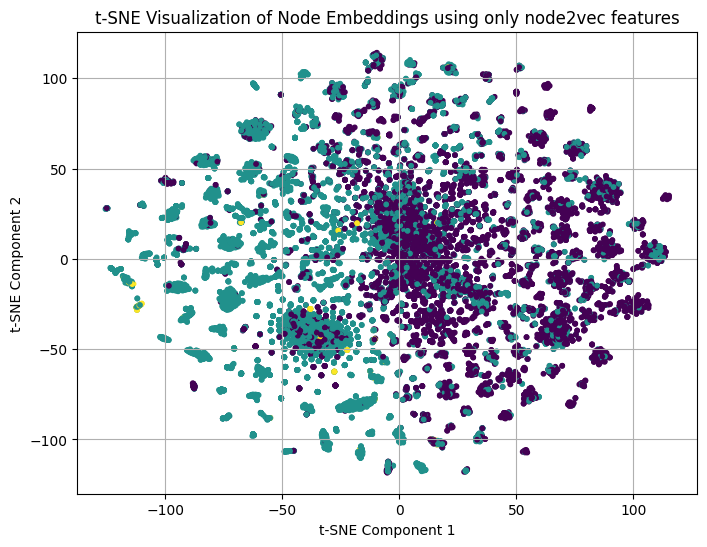

In [66]:
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(X_train_n2v)
node_embeddings_2d_both = tsne.fit_transform(X_train_n2vw2v)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=Y,
    cmap='viridis',
    marker='o',
    s=10
)
plt.title('t-SNE Visualization of Node Embeddings using only node2vec features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

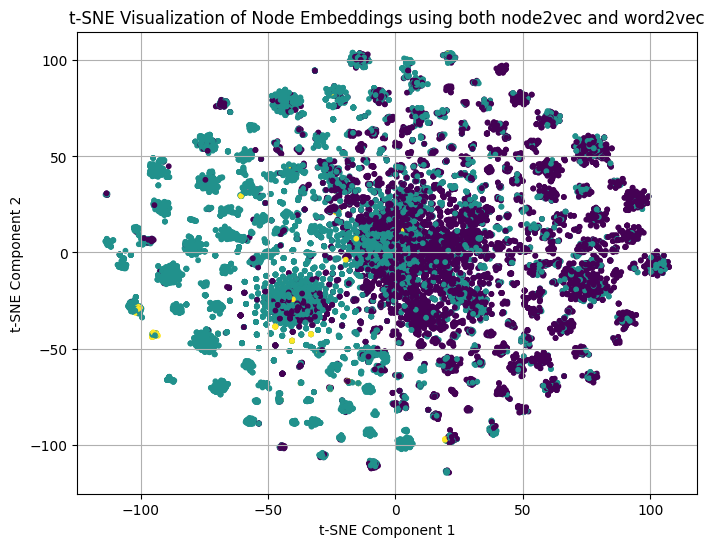

In [68]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    node_embeddings_2d_both[:, 0],
    node_embeddings_2d_both[:, 1],
    c=Y,
    cmap='viridis',  
    marker='o',
    s=10
)
plt.title('t-SNE Visualization of Node Embeddings using both node2vec and word2vec')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

If you look very closely you can see some differences, however they are not too noticeable. This can be explained by the fact that the accuracies are also quite similar, so they are kind of close to being equal.

 Compare performance of word2vec only, node2vec embeddings only (above) and word2vec+node2vec settings.
  Report your intuition below in text as to why one works better than other and to what extent network structure helps compare dto only using word2vec embeddings of titles and subtitles (first result).

 You can also plot the tsne plot of embeddings to gain more intuition